# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alreza Ma'rifatul Amror
- **Email:** alrezam.amror0412@gmail.com
- **ID Dicoding:** alreza_amror

**Latar belakang data dapat dilihat pada link berikut :**  [kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/data)

**hour.csv dan day.csv memiliki variable-variable berikut kecuali variable hr yang tidak dimiliki day.csv**

* instant : rekor indeks
* dteday : tanggal
* season : musim (1:musim semi, 2:musim panas, 3:musim gugur, 4:musim dingin)
* yr :  tahun (0: 2011, 1:2012)
bulan: bulan (1 hingga 12)
* mnth :
* hr : jam (0 hingga 23)
* holiday : hari libur atau tidak
* weekday : day of the week
* workingday : jika bukan holiday atau weekend maka 1, jika sebaliknya maka 0
* weathersit :
  1. Clear, Few clouds, Partly cloudy, Partly cloudy
  2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Suhu yang dinormalisasi dalam Celsius. Nilai diperoleh melalui (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hanya dalam skala per jam)
* attemp : Menormalkan suhu yang terasa dalam Celsius. Nilai diperoleh melalui (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (hanya dalam skala per jam)
* hum : Kelembapan yang dinormalisasi. Nilainya dibagi menjadi 100 (maks)
* windspeed : Kecepatan angin yang dinormalisasi. Nilainya dibagi menjadi 67 (maks)
* casual : jumlah pengguna biasa
* registered : jumlah pengguna terdaftar
* cnt : jumlah total sepeda sewaan termasuk sepeda kasual dan terdaftar


## Menentukan Pertanyaan Bisnis

Pertanyaan berikut adalah hasil dari explorasi pada kedua data
- Jam berapa rata-rata orang menyewa sepeda?
- Bagaimana musim memengaruhi jumlah penyewaan?
- Bagaimana cuaca memengaruhi jumlah penyewaan?
- Bagaimana hari libur memengaruhi jumlah penyewaan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 9999)
pd.set_option('display.max_rows', 9999)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [ ]:
# day.csv - bike sharing counts aggregated on daily basis. Records: 731 days
day_df = pd.read_csv('/content/drive/MyDrive/DICODING(Data Analysis dengan Python)/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
hour_df = pd.read_csv('/content/drive/MyDrive/DICODING(Data Analysis dengan Python)/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

####Assesing day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print(f'Total data terduplikasi => {day_df.duplicated().sum()}')

Total data terduplikasi => 0


In [ ]:
day_df.describe(include=[int,float])

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
day_df.describe(include=['O'])

,dteday
count,731
unique,731
top,2011-01-01
freq,1


####Assesing hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print(f'Total data terduplikasi => {hour_df.duplicated().sum()}')

Total data terduplikasi => 0


In [ ]:
hour_df.describe(include=[int,float])

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
hour_df.describe(include=['O'])

,dteday
count,17379
unique,731
top,2011-01-01
freq,24


### Cleaning Data<br>
pada bagian ini saya melakukan 2 hal yaitu:
1. mendenormalisasi variable temp, atemp, hum, dan windspeed menjadi data yang sebenarnya sehingga dapat dianalisis dengan lebih mudah
2. mengganti tipe data dteday

####Cleaning day_df

In [ ]:
# fungsi untuk mendenormalisasi data temp dan atemp
def Denorm(val, t_min, t_max):
  # normalisasi dilakukan dengan cara membalik rumus untuk menormalisasi data sebelumnya
  denorm_val = val * (t_max - t_min) + t_min
  return denorm_val

# normalisasi variabel temp
day_df['temp'] = Denorm(day_df['temp'], -8, 39)

# normalisasi variabel atemp
day_df['atemp'] = Denorm(day_df['atemp'], -16, 50)

# normalisasi variabel hum
day_df['hum'] = day_df['hum']*100

# normalisasi variabel windspeed
day_df['windspeed'] = day_df['windspeed']*67

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,8.175849,7.999250,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,9.083466,7.346774,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,1.229108,-3.499270,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,1.400000,-1.999948,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,2.666979,-0.868180,43.6957,12.522300,82,1518,1600


####Cleaning hour_df

In [ ]:
# normalisasi variabel temp
hour_df['temp'] = Denorm(hour_df['temp'], -8, 39)

# normalisasi variabel atemp
hour_df['atemp'] = Denorm(hour_df['atemp'], -16, 50)

# normalisasi variabel hum
hour_df['hum'] = hour_df['hum']*100

# normalisasi variabel windspeed
hour_df['windspeed'] = hour_df['windspeed']*67

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,3.28,3.0014,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,2.34,1.9982,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,2.34,1.9982,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3.28,3.0014,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,3.28,3.0014,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ... <br>


In [ ]:
print(hour_df.head(24)['temp'].sum()/24)
print(hour_df.head(24)['atemp'].sum()/24)

8.175833333333333
7.99925


**Note**<br>
Angka tersebut merupakan temperatur dan temperatur yang terasa di hari pertama pada dataset day_df<br>
Maka dapat disimpulkan bahwa setiap 1 row pada data day_df mewakili rata-rata dari 24 rows data hour_df

In [ ]:
season_labels = {
    1 : 'springer',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

weather_labels = {
    1 : 'Cerah',
    2 : 'Berawan',
    3 : 'HujanRingan',
    4 : 'HujanLebat'
}

day_df['season'] = day_df['season'].map(season_labels)
hour_df['season'] = hour_df['season'].map(season_labels)

day_df['weathersit'] = day_df['weathersit'].map(weather_labels)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_labels)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,6,0,Berawan,8.175849,7.999250,80.5833,10.749882,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,Berawan,9.083466,7.346774,69.6087,16.652113,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,Cerah,1.229108,-3.499270,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,Cerah,1.400000,-1.999948,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,Cerah,2.666979,-0.868180,43.6957,12.522300,82,1518,1600


In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,0,6,0,Cerah,3.28,3.0014,81.0,0.0,3,13,16
1,2,2011-01-01,springer,0,1,1,0,6,0,Cerah,2.34,1.9982,80.0,0.0,8,32,40
2,3,2011-01-01,springer,0,1,2,0,6,0,Cerah,2.34,1.9982,80.0,0.0,5,27,32
3,4,2011-01-01,springer,0,1,3,0,6,0,Cerah,3.28,3.0014,75.0,0.0,3,10,13
4,5,2011-01-01,springer,0,1,4,0,6,0,Cerah,3.28,3.0014,75.0,0.0,0,1,1


In [ ]:
# jumlah peminjaman perhari
reg_df = day_df.groupby("dteday")['cnt'].sum()
reg_df = reg_df.reset_index()
reg_df.head()

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


In [ ]:
# jam dan jumlah peminjaman
hour_df.groupby('hr').agg({'cnt' : 'sum', 'casual' : 'sum', 'registered' : 'sum'})

,cnt,casual,registered
hr,,,
0,39130,7375,31755
1,24164,4709,19455
2,16352,3412,12940
3,8174,1893,6281
4,4428,874,3554
5,14261,1012,13249
6,55132,3017,52115
7,154171,8037,146134
8,261001,15761,245240


In [ ]:
# pengaruh cuaca tergadap jumlah penyewaan
day_df.groupby('weathersit')['cnt'].sum()

weathersit
Berawan         996858
Cerah          2257952
HujanRingan      37869
Name: cnt, dtype: int64

In [ ]:
# pengaruh cuaca tergadap jumlah penyewaan terdaftar
day_df.groupby('weathersit')['registered'].sum()

weathersit
Berawan         827082
Cerah          1811606
HujanRingan      33974
Name: registered, dtype: int64

In [ ]:
# pengaruh cuaca tergadap jumlah penyewaan casual
day_df.groupby('weathersit')['casual'].sum()#.reset_index()


weathersit
Berawan        169776
Cerah          446346
HujanRingan      3895
Name: casual, dtype: int64

In [ ]:
day_df.groupby('season').agg({'cnt' : 'sum', 'registered' : 'sum', 'casual':'sum'}).reset_index().sort_values(by='cnt')

,season,cnt,registered,casual
1,springer,471348,410726,60622
3,winter,841613,711831,129782
2,summer,918589,715067,203522
0,fall,1061129,835038,226091


In [ ]:
# pengaruh hari libur terhadap penyewaan sepeda
day_df.groupby('workingday').agg({'cnt' : 'sum', 'registered' : 'sum', 'casual':'sum'}).reset_index()

,workingday,cnt,registered,casual
0,0,1000269,683537,316732
1,1,2292410,1989125,303285


## Visualization & Explanatory Analysis

### Pertanyaan 1 : Jam berapa rata-rata orang menyewa sepeda?

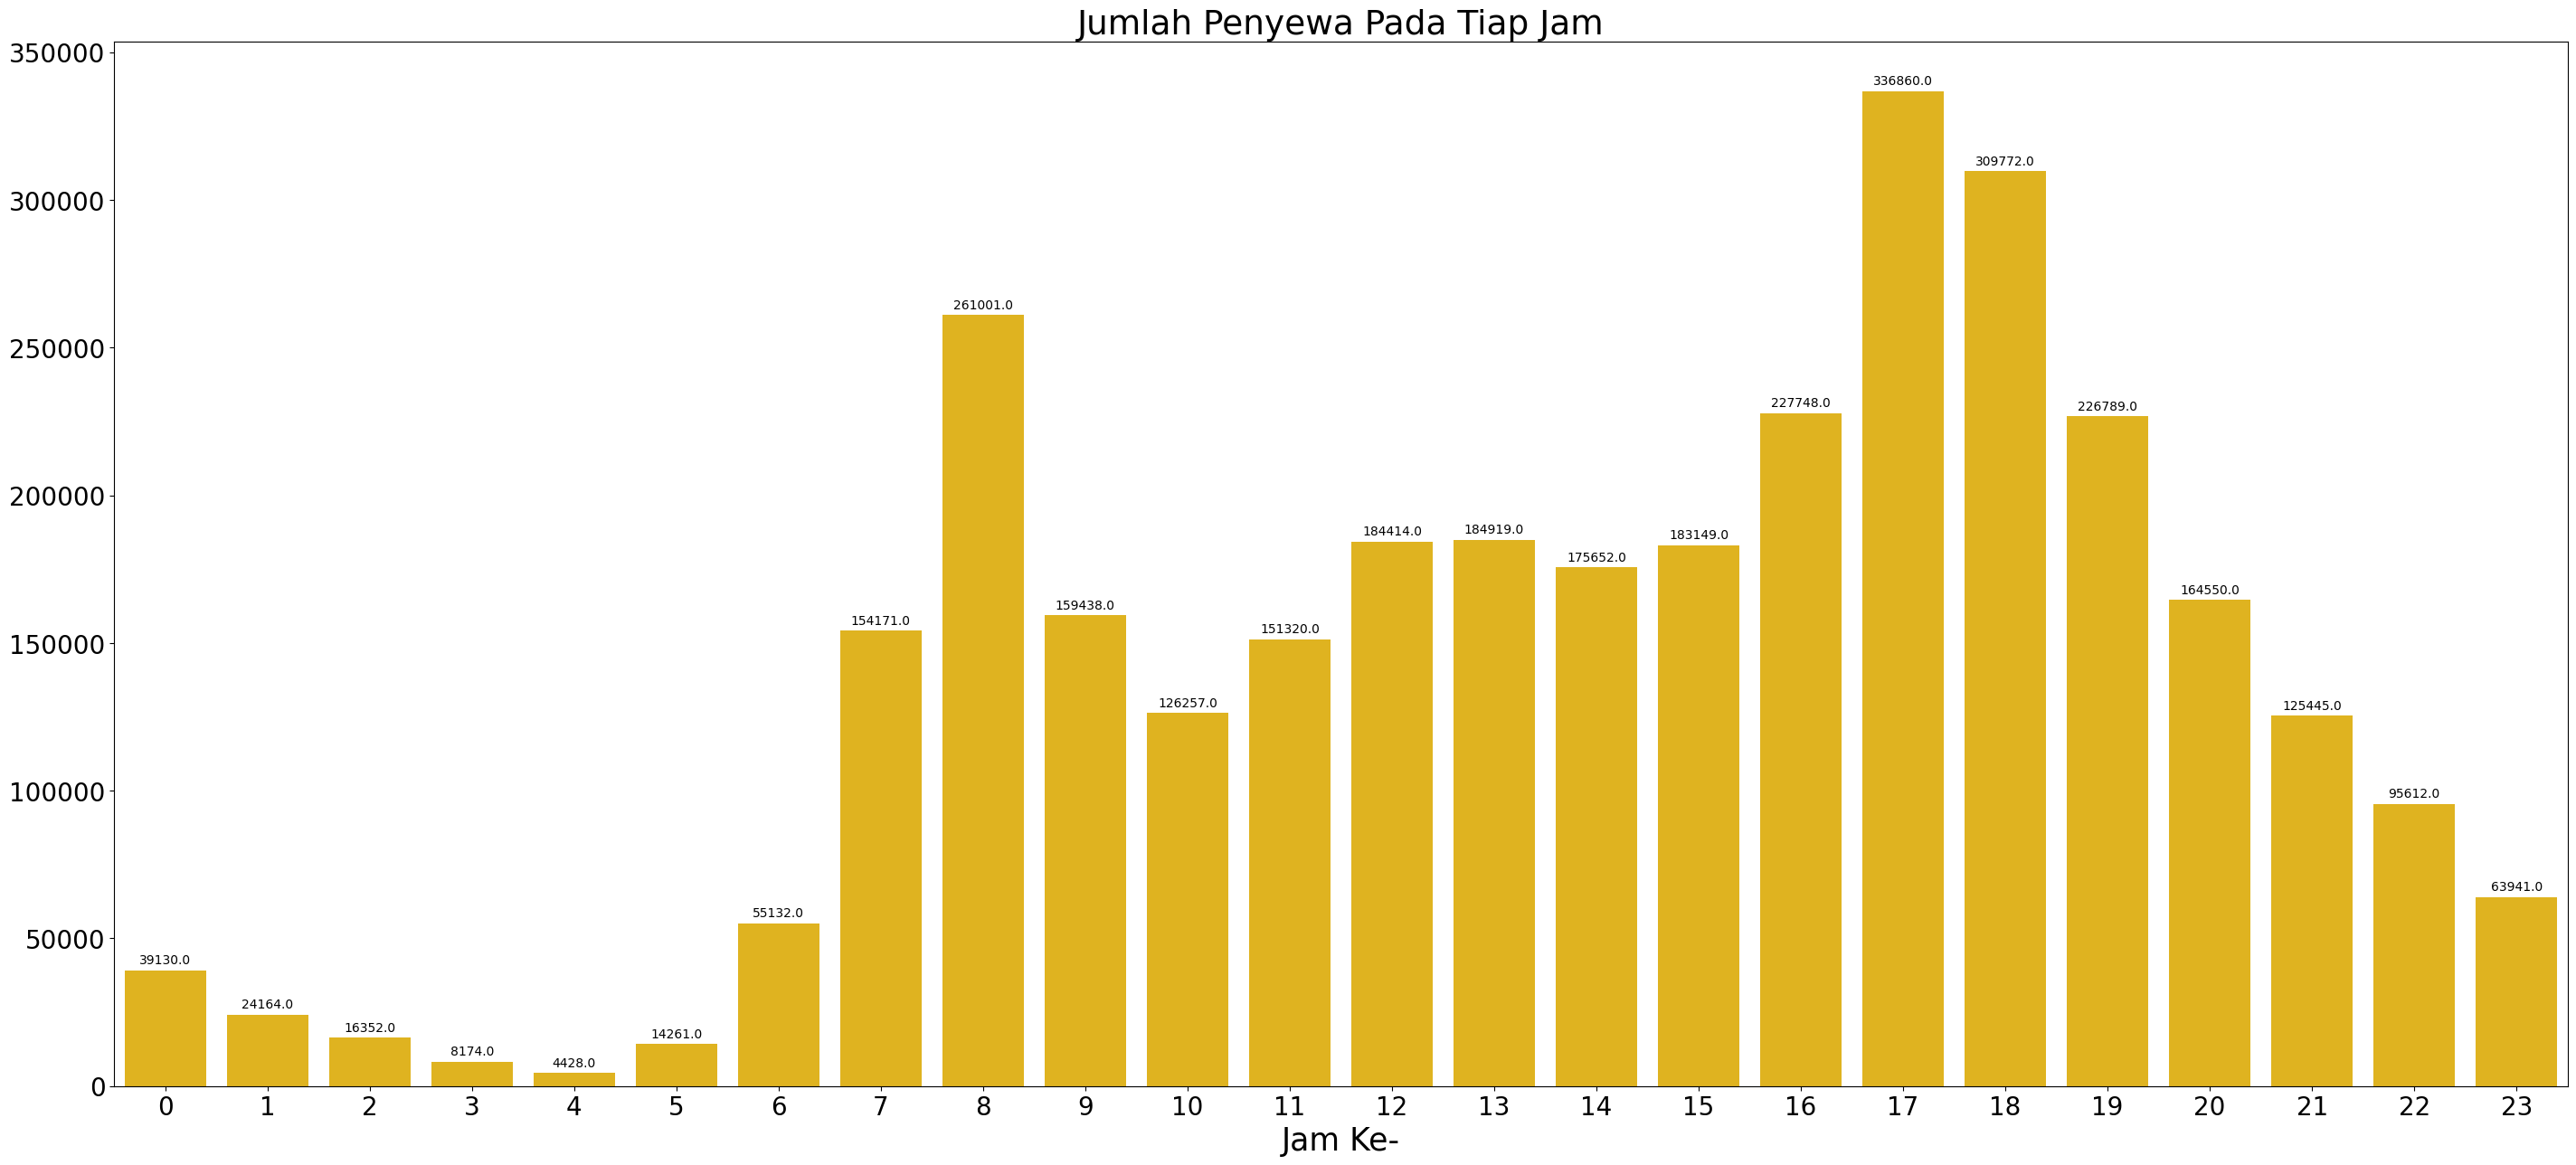

In [ ]:
plt.figure(figsize = (35,15))
sns.set_color_codes('bright')
ax = sns.barplot(hour_df, x="hr", y="cnt", estimator="sum", color = 'y', errorbar=None)
for p in ax.patches:
                    # Valuenya                          # Posisi
    ax.annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')
# ax.bar_label(ax.containers[0], fontsize=15);
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Jam Ke-', fontsize = 25)
plt.ylabel(None)
plt.title('Jumlah Penyewa Pada Tiap Jam', fontsize = 27)
plt.show()

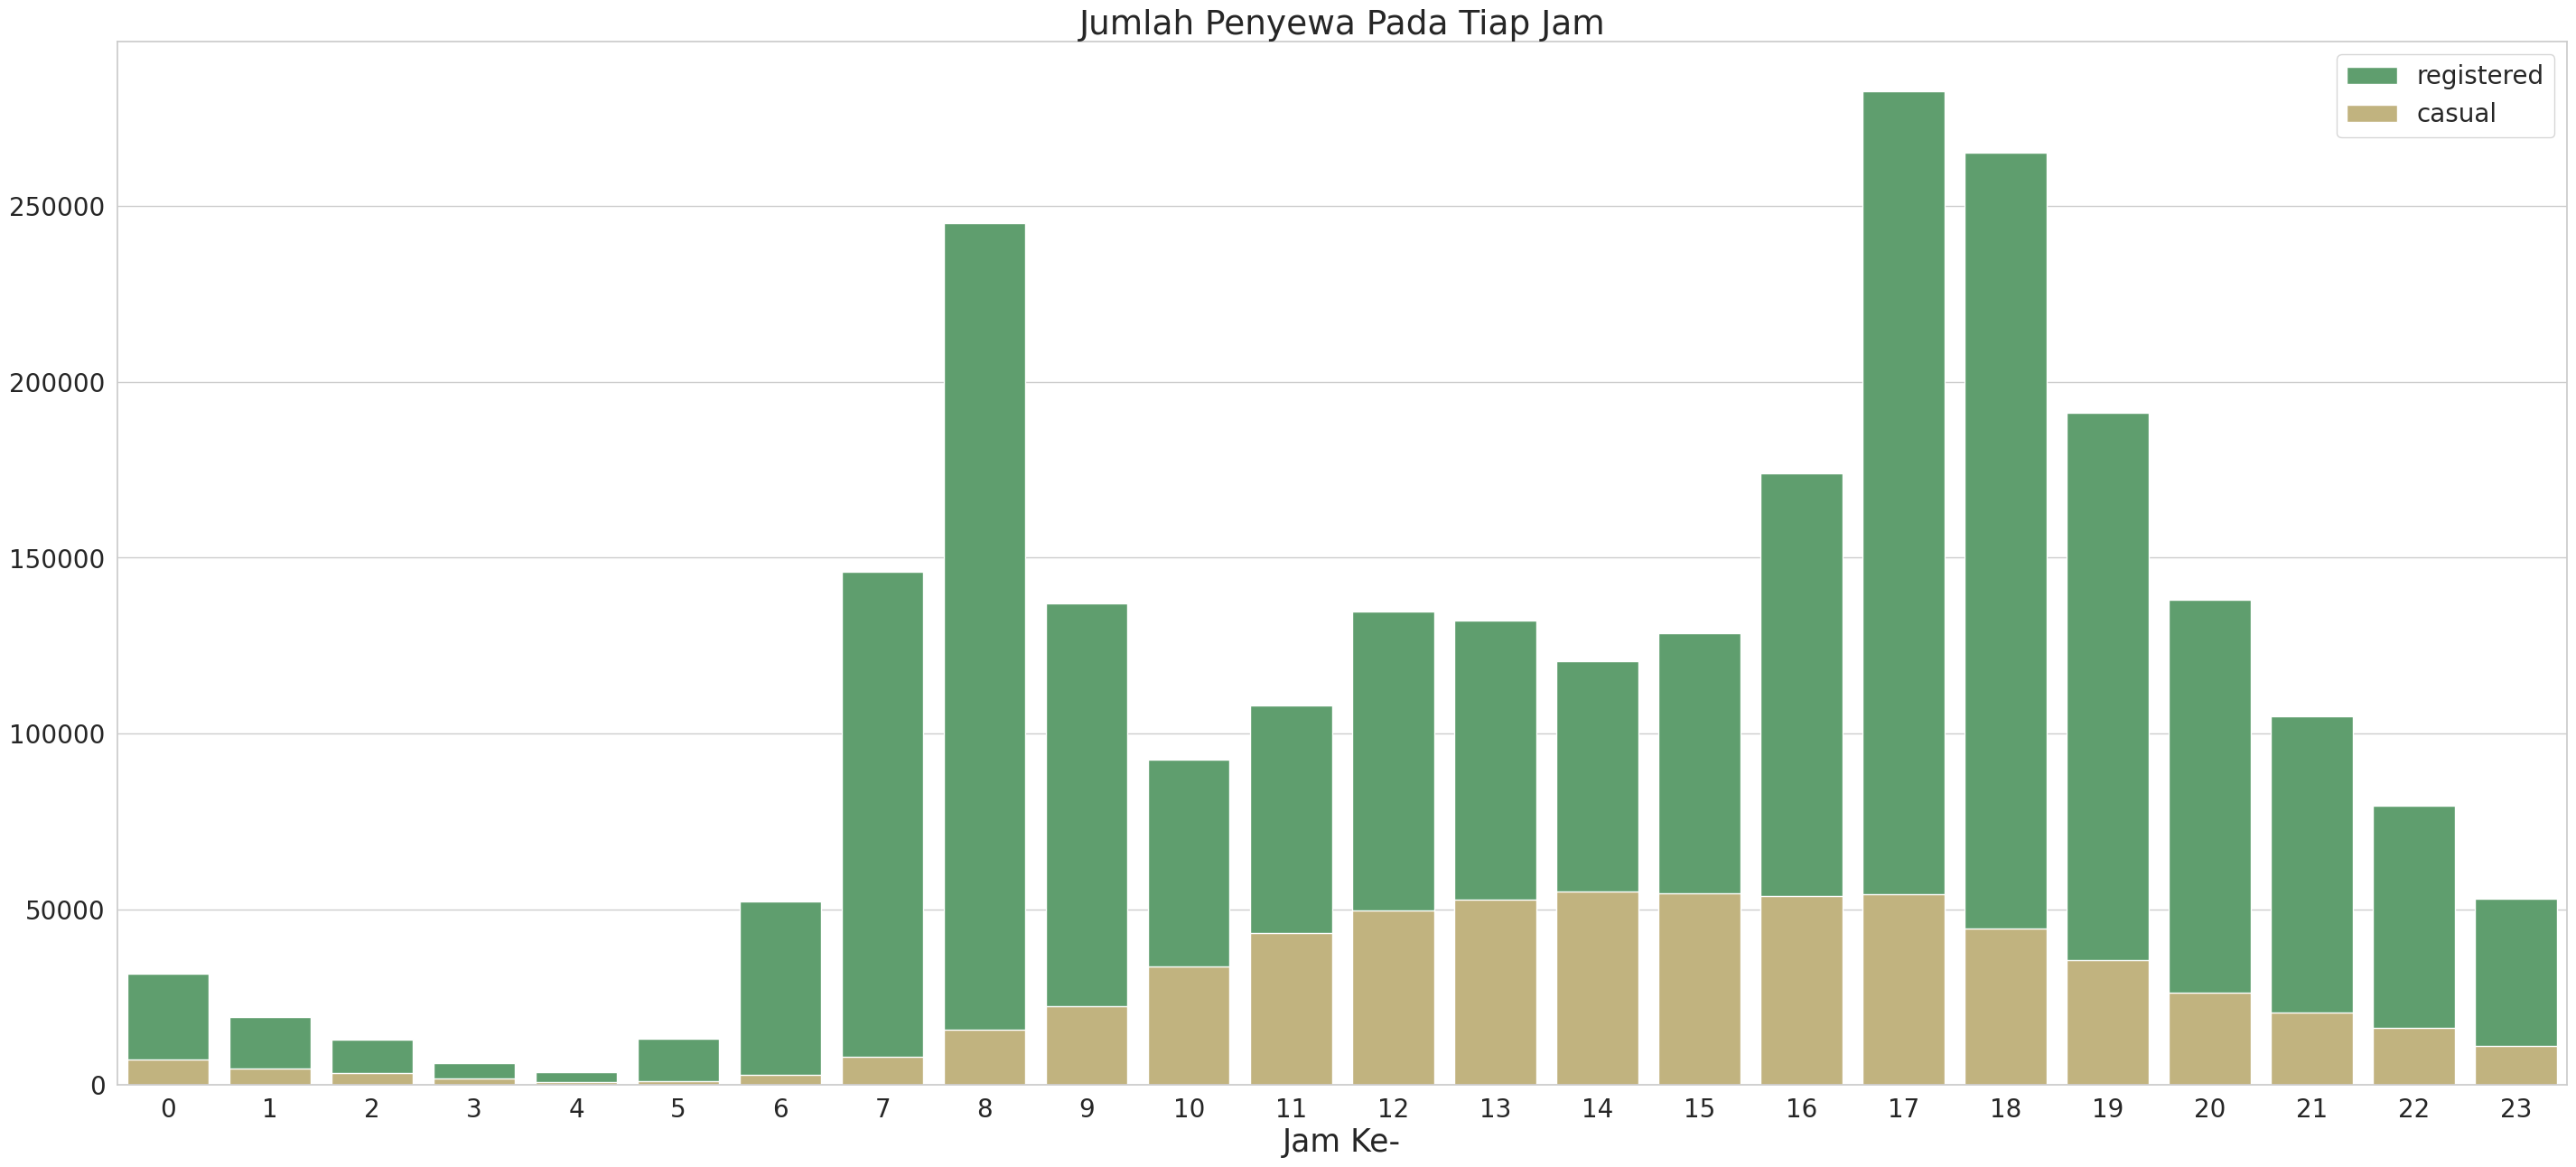

In [ ]:
plt.figure(figsize=(35, 15))
sns.set(style="whitegrid")
sns.barplot(hour_df, x="hr", y="registered", estimator="sum", errorbar=None, color = 'g', label = 'registered')
sns.barplot(hour_df, x="hr", y="casual", estimator="sum", errorbar=None, color = 'y', label = 'casual')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Jam Ke-', fontsize = 25)
plt.ylabel(None)
plt.legend(fontsize = 20)
plt.title('Jumlah Penyewa Pada Tiap Jam', fontsize = 27)
plt.show()

**Note**
* Interval jam 20.00 hingga jam 05.00 peminjaman mulai menurun
* Diluar interval tersebut cenderung naik

### Pertanyaan 2 : Bagaimana cuaca memengaruhi jumlah penyewaan?<br>
Meskipun menggunakan diksi "pengaruh", hubungan dari kedua variabel tersebu tidak saya gambarkan dengan scatterplot melainkan menggunakan barplot karena merupakan kategorikal data sehingga memudahkan menganalisis setiap nilai


<ipython-input-30-c38878c86694>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(day_df, x="weathersit", y="cnt", estimator="mean", errorbar=None, palette = 'inferno')


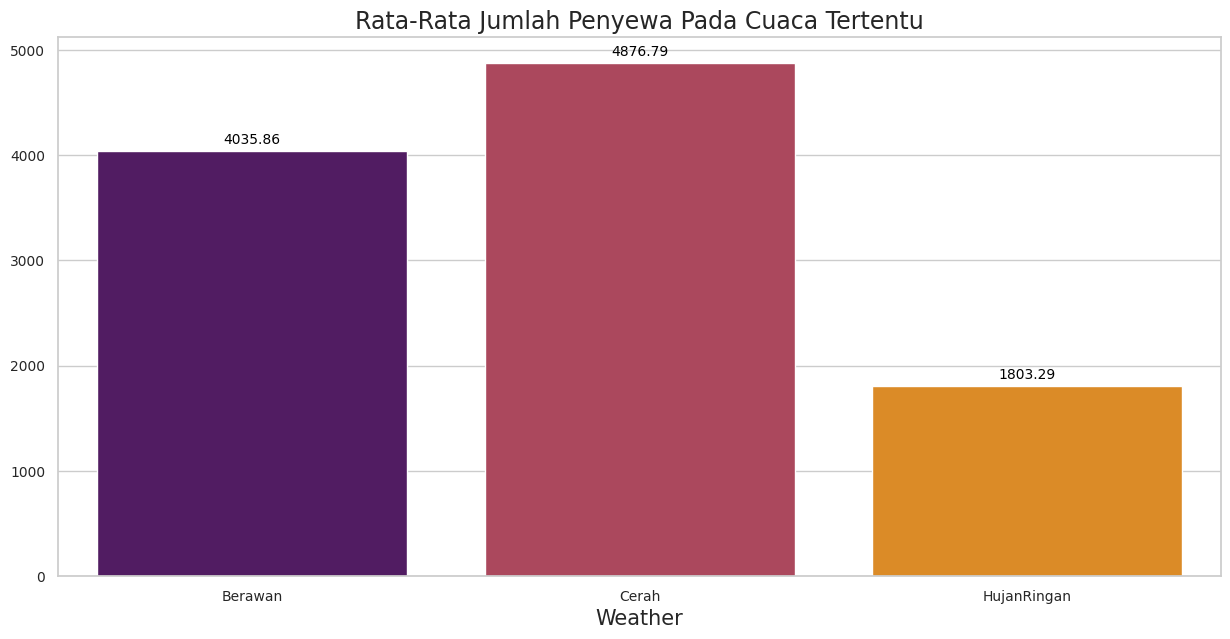

In [ ]:
# day_df.groupby('weathersit')['cnt'].sum()
plt.figure(figsize = (15,7))
sns.set_color_codes('bright')
ax = sns.barplot(day_df, x="weathersit", y="cnt", estimator="mean", errorbar=None, palette = 'inferno')
for p in ax.patches:
                    # Valuenya                          # Posisi
    ax.annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')
# ax.bar_label(ax.containers[0], fontsize=15)
plt.xticks(fontsize = 10)
plt.gca().ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 10)
plt.xlabel('Weather', fontsize = 15)
plt.ylabel(None)
plt.title('Rata-Rata Jumlah Penyewa Pada Cuaca Tertentu', fontsize = 17)
plt.show()

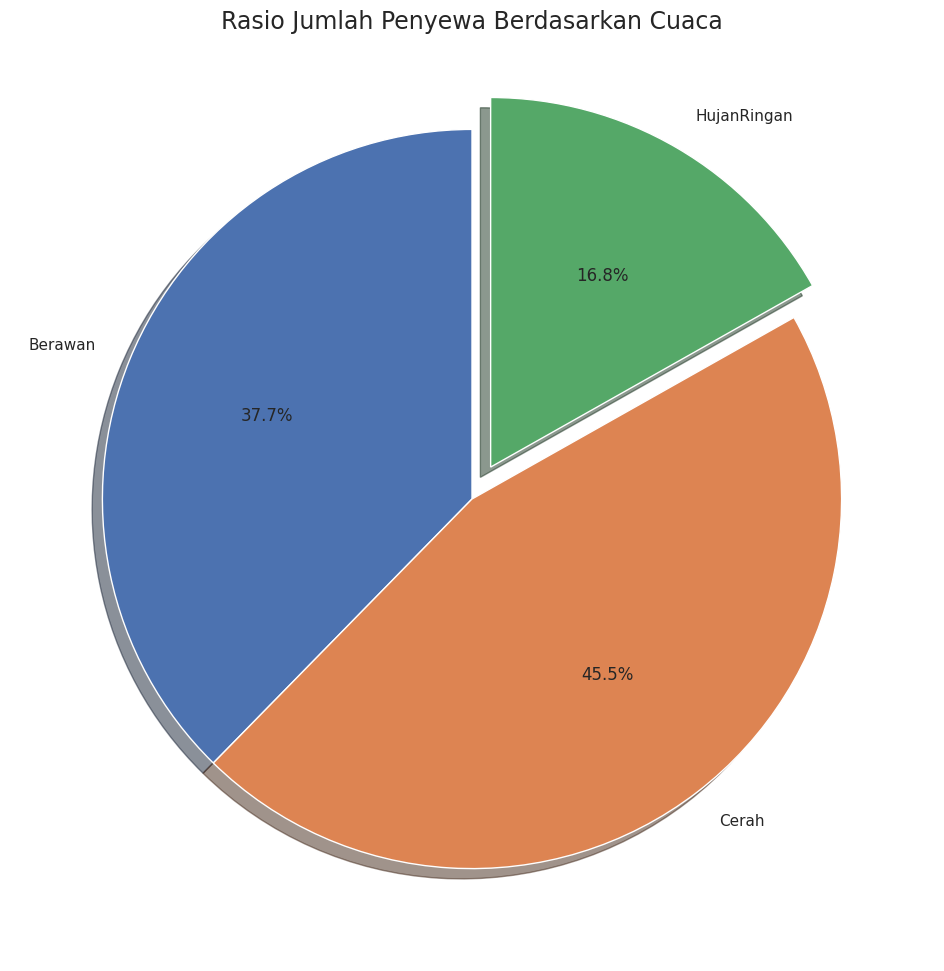

In [ ]:
weather = day_df.groupby('weathersit')['cnt'].mean().reset_index()
explode = (0, 0, 0.1)
plt.figure(figsize=(12, 12))
sns.set_color_codes('bright')
plt.pie(weather['cnt'], labels=weather['weathersit'], autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title('Rasio Jumlah Penyewa Berdasarkan Cuaca', fontsize = 17)
plt.show()

**Note**

saat cuaca cerah orang-orang cenderung memilih untuk menyewa

###Pertanyaan 3 : Bagaimana musim memengaruhi jumlah penyewaan?<br>
Meskipun menggunakan diksi "pengaruh", hubungan dari kedua variabel tersebu tidak saya gambarkan dengan scatterplot melainkan menggunakan barplot karena merupakan kategorikal data sehingga memudahkan menganalisis setiap nilai


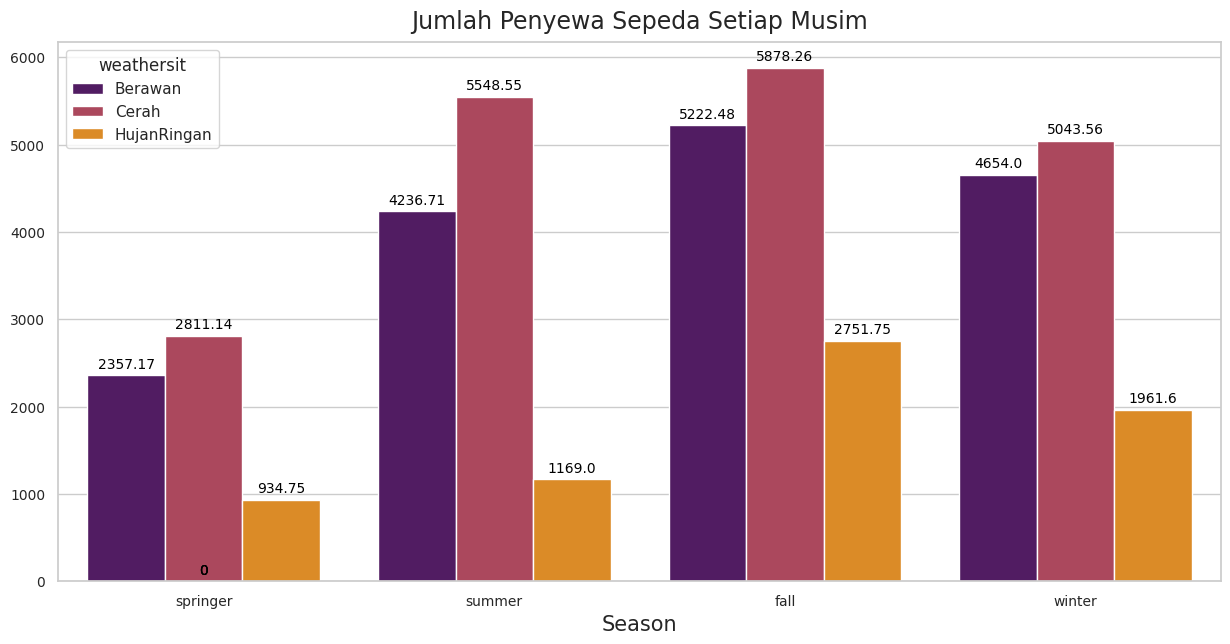

In [ ]:
# day_df.groupby('season').agg({'cnt' : 'sum', 'registered' : 'sum', 'casual':'sum'}).reset_index()
plt.figure(figsize = (15,7))
sns.set_color_codes('bright')
ax = sns.barplot(day_df, x="season", y="cnt", estimator="mean", hue = 'weathersit', errorbar=None, palette = 'inferno')
for p in ax.patches:
                    # Valuenya                          # Posisi
    ax.annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')
# ax.bar_label(ax.containers[0], fontsize=15)
plt.xticks(fontsize = 10)
plt.gca().ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 10)
plt.xlabel('Season', fontsize = 15)
plt.ylabel(None)
plt.title("Jumlah Penyewa Sepeda Setiap Musim", fontsize=17, pad=10)
plt.show()

###Pertanyaan 4 : Bagaimana hari libur memengaruhi jumlah penyewaan?<br>
Meskipun menggunakan diksi "pengaruh", hubungan dari kedua variabel tersebu tidak saya gambarkan dengan scatterplot melainkan menggunakan barplot karena merupakan kategorikal data sehingga memudahkan menganalisis setiap nilai

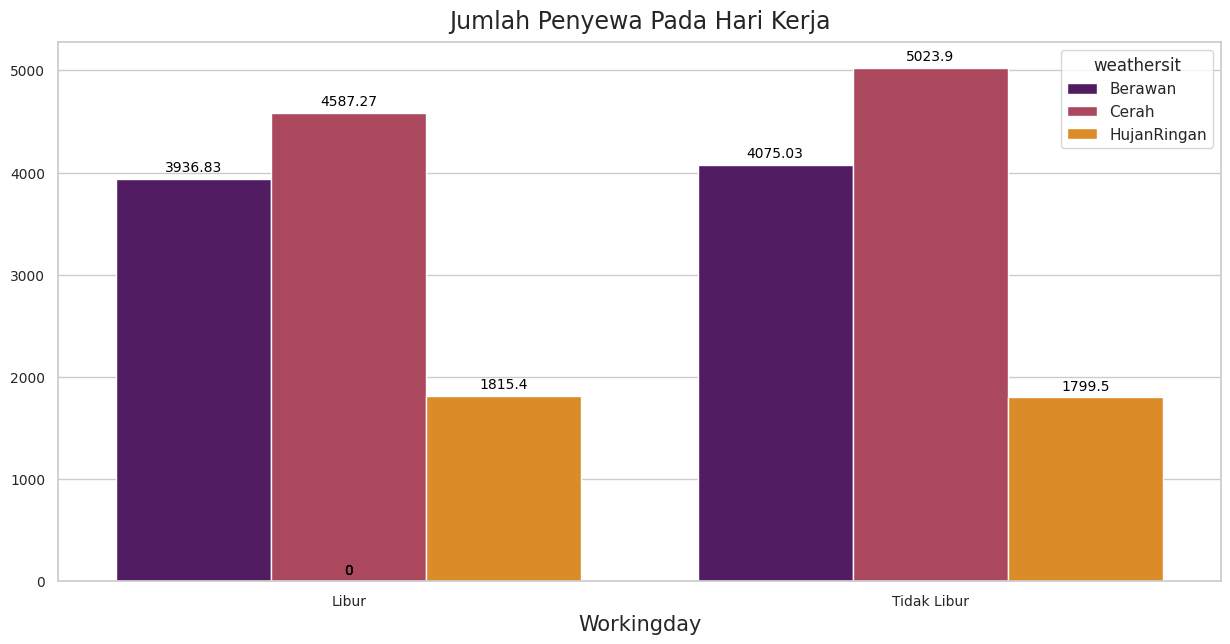

In [ ]:
# day_df.groupby('workingday').agg({'cnt' : 'sum', 'registered' : 'sum', 'casual':'sum'}).reset_index()
plt.figure(figsize = (15,7))
sns.set_color_codes('bright')
ax = sns.barplot(day_df, x="workingday", y="cnt", estimator="mean", errorbar=None, hue = 'weathersit', palette = 'inferno')
for p in ax.patches:
                    # Valuenya                          # Posisi
    ax.annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')
plt.xticks([1, 0], ['Tidak Libur', 'Libur'])
plt.xticks(fontsize = 10)
plt.gca().ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 10)
plt.xlabel('Workingday', fontsize=15)
plt.ylabel(None)
plt.title('Jumlah Penyewa Pada Hari Kerja', fontsize = 17, pad = 10)
plt.show()

**Note**
Pada hari libur peminjaman sepeda cenderung lebih sedikit daripada ketika hari kerja

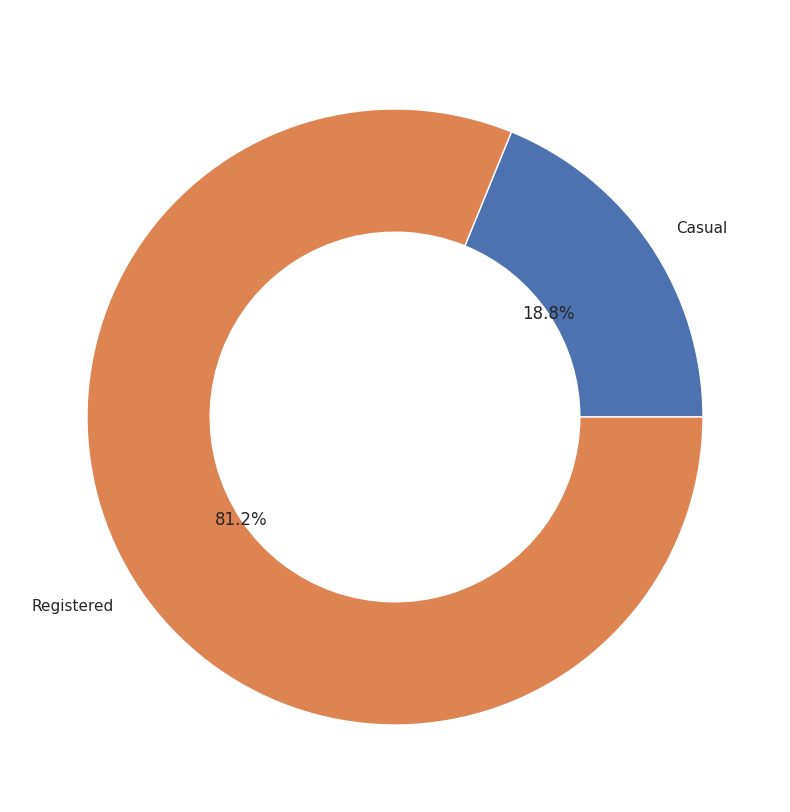

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
total_casual = sum(day_df['casual'])
total_registered = sum(day_df['registered'])
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']
plt.pie(data, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.4, edgecolor='w'))
plt.title('Rasio Customer Terdaftar dan Casual', color = 'w')
plt.show()

**Note**

Penyewa teregistrasi jauh lebih banyak daripda Penyewa yang tidak teregistrasi

##Teknik Lanjutan Dengan Clustering Analysis

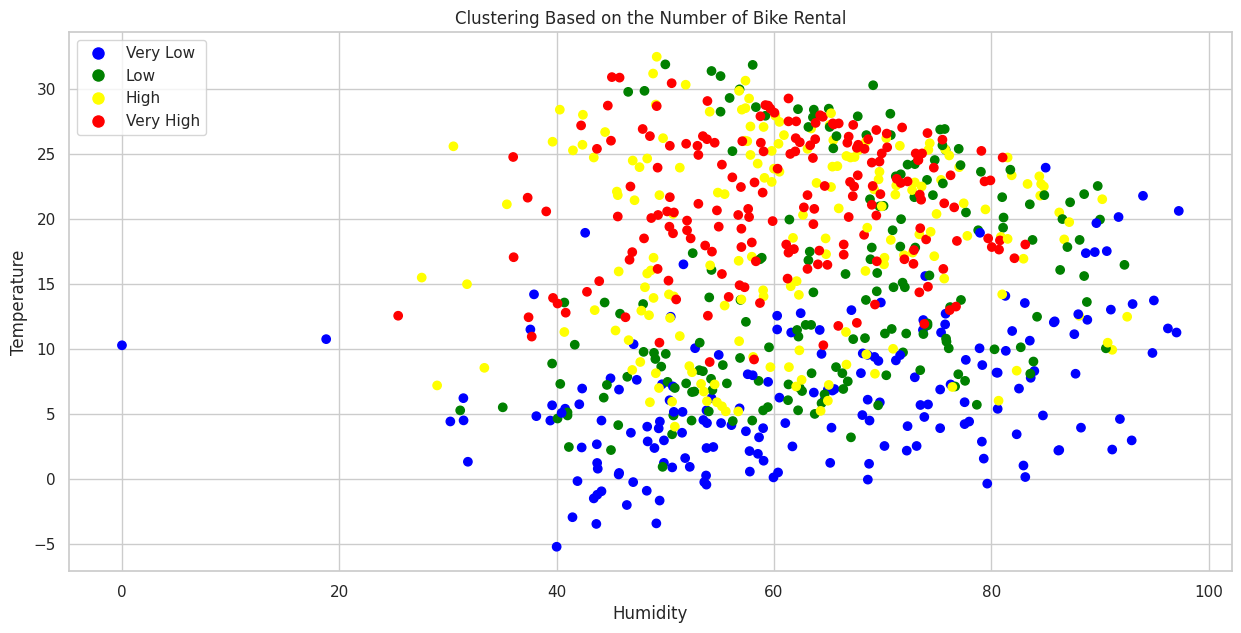

In [ ]:
plt.figure(figsize = (15,7))
day_df['cluster'] = 'Other'
day_df.loc[(day_df['cnt'] >= day_df['cnt'].min()) & (day_df['cnt'] < day_df['cnt'].quantile(0.25)), 'cluster'] = 'Very Low'
day_df.loc[(day_df['cnt'] >= day_df['cnt'].quantile(0.25)) & (day_df['cnt'] < day_df['cnt'].quantile(0.50)), 'cluster'] = 'Low'
day_df.loc[(day_df['cnt'] >= day_df['cnt'].quantile(0.50)) & (day_df['cnt'] < day_df['cnt'].quantile(0.75)), 'cluster'] = 'High'
day_df.loc[(day_df['cnt'] >= day_df['cnt'].quantile(0.75)) & (day_df['cnt'] <= day_df['cnt'].max()), 'cluster'] = 'Very High'

color = {
    'Very Low' : 'blue',
    'Low' : 'green',
    'High' : 'yellow',
    'Very High' : 'red'
}

scatter_plot = plt.scatter(day_df['hum'], day_df['temp'], c=day_df['cluster'].map(color))
plt.title('Clustering Based on the Number of Bike Rental')
plt.ylabel('Temperature')
plt.xlabel('Humidity')

legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'{label}') for label, color in color.items()]
plt.legend(handles=legend_labels, loc = 'upper left')

**Note :** <br>
label `Very Low` berarti jumlah sepeda yang disewakan pada hari itu berada diquantile pertama <br>
label `Low` berarti jumlah sepeda yang disewakan pada hari itu berada diquantile ke-dua <br>
label `High` berarti jumlah sepeda yang disewakan pada hari itu berada diquantile ke-tiga <br>
label `Very High` berarti jumlah sepeda yang disewakan pada hari itu berada diquantile ke-empat <br>

## Conclusion

- Conclution pertanyaan 1<br>
Rata-rata orang-orang menyewa sepeda pada jam 08.00, 17.00, dan 18.00. Pada jam tersebut memang waktu dimana orang-orang mulai beraktivitas diluar seperti berangkat kerja ataupun pulang kerja. Pada jam tersebut juga sangan nikmat jika hanya sekedar bersepeda santai.<br>

- Conclution pertanyaan 2<br>
Penyewaan sepeda tertinggi terjadi jika cuaca hari itu terbilang cerah. Kontras ketika cuaca sedang hujan orang-orang pasti lebih memilih menggunakan armada angkutan umum atau menggunakan kendaraan pribadi untuk mobilitas dalam kota daripada harus menyewa sepeda

- Conclution pertanyaan 3<br>
Pada musim-musim tertentu orang-orang lebih memilih menyewa sepeda, puncaknya ketika musim gugur lebih dari 100 ribu orang telah menyewa pada musim tersebut selama dua tahun terakhir.

- Conclution pertanyaan 4<br>
pada hari libur ataupun pada hari kerja jumlah sepeda yang disewa relative tidak jauh berbeda, kondisi ini bisa saja terjadi karena pada hari libur pun tidak menutup kemungkinan orang-orang masih menyewa sepeda untuk hanya sekedar bersepeda santai.